# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

#### **Introducción**

En este trabajo práctico se propone que cada grupo de alumnos se enfrente a un problema real
de ciencia de datos, que trabaje en cada una de las etapas del proceso y que pueda resolverlo
aplicando los contenidos que vemos en la materia.

Vamos a utilizar el conjunto de datos provisto por la empresa [Properati](https://www.properati.com.ar/) correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021 .
La información fue extraída desde BigQuery (producto de Google Cloud para consultar grandes
volúmenes de datos) donde la empresa disponibiliza sus datasets con avisos de propiedades y
desarrollos inmobiliarios que están y estuvieron publicados en Properati en todo Latinoamérica
desde 2015 hasta dos meses atrás. Los datos se actualizan diariamente para mayor información
pueden consultar el siguiente [link](https://www.properati.com.ar/data/).

El objetivo principal del trabajo será aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión. En la sección enunciado se detallan los
objetivos particulares.

#### **Descargamos en DataSet**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# url='https://drive.google.com/file/d/1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI/view?usp=sharing'
# url='https://drive.google.com/uc?id=' + url.split('/')[-2]
# dp_properity = pd.read_csv(url)

dp_properity=pd.read_csv('./Datasets/properati_argentina_2021.csv')

In [3]:
df = dp_properity.copy()

In [4]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [5]:
df.shape

(460154, 20)

#### **Enunciado**
El conjunto de datos a utilizar properati_argentina_2021 se encuentra disponible en el
siguiente [enlace](https://drive.google.com/drive/folders/1BPCdW_Jab91WhMqfXcf0jYMHzjxW_XkD?usp=sharing), la descripción de las variables se encuentra disponible [aquí](https://www.properati.com.ar/data/). Para este trabajo
se plantean los siguientes objetivos generales:

* _Agrupamiento_: el objetivo será analizar si es posible agrupar los datos en función de
algún criterio, identificando a qué obedece el mismo.

* _Clasificación_: el objetivo será clasificar cada anuncio en tres categorías relacionadas al
precio de venta (alto, medio y bajo).

* _Regresión_: el objetivo será predecir el precio de venta en dólares de una propiedad tipo
vivienda ubicada en Capital Federal.

A continuación se detallan las etapas que deben ser desarrolladas en el trabajo:

### **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

In [6]:
# Vamos a eliminar las filas que tengan precio en pesos o NaN
idx_prices = df[df.property_currency.apply(lambda curr: curr != 'USD')].index
df.drop(idx_prices, inplace=True)
# Tambien eliminamos las propiedades que no se encuentren en Capital Federal
idx_location = df[df.place_l2.apply(lambda loc: loc != 'Capital Federal')].index
df.drop(idx_location, inplace=True)
# Eliminamos las que no sean operaciones de tipo venta
idx_op = df[df.operation.apply(lambda op: op != 'Venta')].index
df.drop(idx_op, inplace=True)
# Y por ultimo eliminamos las que no sean de tipo vivienda
type_vivienda = ['Departamento', 'PH', 'Casa']
idx_type = df[df.property_type.apply(lambda t: t not in type_vivienda)].index
df.drop(idx_type, inplace=True)

df.shape

(94249, 20)

In [7]:
# Ademas vamos a eliminar filas duplicadas
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df.shape

(94249, 20)

**a) Exploración Inicial:** analizar cada variable, considerando los siguientes aspectos
* Tipo de variable
* Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda.
* Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno.
* Determinar variables irrelevantes en el análisis (Ids por ejemplo)
* Realizar un análisis gráfico de las distribuciones de las variables
* Analizar las correlaciones existentes entre las variables.

A partir de este análisis generar conclusiones sobre los datos.



<h4 align="center"><b> Tipo de variable </b></h4>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94249 entries, 0 to 94248
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94249 non-null  object 
 1   start_date                94249 non-null  object 
 2   end_date                  94249 non-null  object 
 3   created_on                94249 non-null  object 
 4   latitud                   90519 non-null  float64
 5   longitud                  90519 non-null  float64
 6   place_l2                  94249 non-null  object 
 7   place_l3                  93832 non-null  object 
 8   place_l4                  3643 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 94249 non-null  object 
 12  property_type             94249 non-null  object 
 13  property_rooms            93205 non-null  float64
 14  proper

In [9]:
dic = {'object':0,  'float': 0}
f_float = []
f_object = []

for f in dp_properity.columns:
    if df[f].dtype == 'O': 
        f_object.append(f)
        dic['object'] = dic.get('object', 0) + 1 
    if df[f].dtype == 'float': 
        f_float.append(f)
        dic['float'] = dic.get('float', 0) + 1
    
df_type = pd.DataFrame()
df_type['Type'] = None
for key in dic:
    df_type.loc[key] = [dic[key]]

In [10]:
df_type

,Type
object,12
float,8


Se observa que hay 12 variables string y 8 float

<h4 align="center"><b> Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda. </b></h4>

In [11]:
df.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,90519.000000,90519.000000,0.0,93205.000000,83262.000000,89405.000000,90895.000000,9.424900e+04
mean,-34.591481,-58.449795,NaN,2.822799,2.014629,109.092970,87.931932,2.262382e+05
std,0.181719,0.292630,NaN,1.426148,1.129767,980.401976,990.927129,3.186035e+05
min,-53.788624,-71.471192,NaN,1.000000,-1.000000,10.000000,1.000000,5.000000e+03
25%,-34.615975,-58.466522,NaN,2.000000,1.000000,45.000000,40.000000,9.500000e+04
50%,-34.595790,-58.439000,NaN,3.000000,2.000000,65.000000,58.000000,1.439000e+05
75%,-34.577413,-58.408862,NaN,4.000000,3.000000,105.000000,88.000000,2.370000e+05
max,-24.219827,-54.133330,NaN,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07


In [12]:
df[f_float].mode()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.54125,-58.472966,NaN,3.0,1.0,50.0,40.0,110000.0


<h4 align="center"><b> Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno </b></h4>

<h5 style="color:#FF0000"> Tarea de cada uno. <br> Luego Ctrl + C y Ctrl + V</h5>

<h4 align="center"><b> Determinar variables irrelevantes en el análisis </b></h4>

Se eliminara el feature Id y place_l6.
Las razones:
* Id: Por ser irrelevante
*  Place_l2: Porque solo vamos a trabajar propiedades en Capital Federal
*  Place_l5: Por solo tener valores nan para las propiedades en Capital Federal
*  Place_l6: Por solo tener valores nan
*  Property_currency: Porque solo vamos a utilizar valores en USD
*  Operation: Porque solo vamos a trabajar operaciones de tipo venta

In [13]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(f"Porcentaje de nan de place_l6: { na_ratio.place_l6}")

Porcentaje de nan de place_l6: 100.0


In [14]:
df.drop(columns = ['place_l2', 'place_l5', 'place_l6', 'id', 'property_currency', 'operation'], inplace=True) 

<h5 style="color:#FF0000"> Si se encuentra uno mas avisar y agregarlo a la lista</h5>

#### Feature: property_rooms

In [15]:
# Medidas de resumen para la variable property_rooms
df.property_rooms.describe()

count    93205.000000
mean         2.822799
std          1.426148
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         40.000000
Name: property_rooms, dtype: float64

In [16]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_rooms.unique())

28

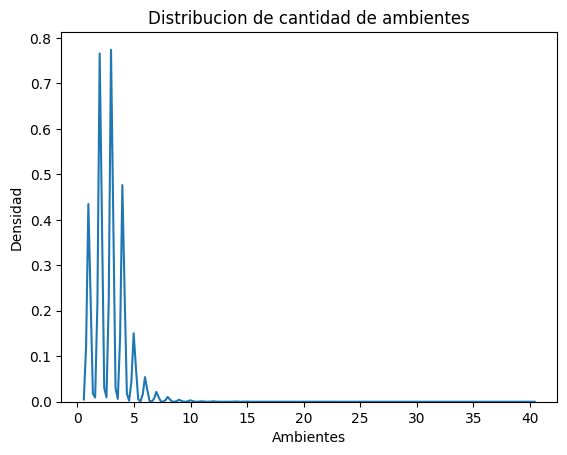

In [17]:
# Distribucion de la variable property_rooms
sns_hist=sns.kdeplot(data=df.property_rooms).set(title="Distribucion de cantidad de ambientes",xlabel="Ambientes",ylabel="Densidad")

#### Feature: property_bedrooms

In [18]:
# Medidas de resumen para la variable property_bedrooms
df.property_bedrooms.describe()

count    83262.000000
mean         2.014629
std          1.129767
min         -1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         70.000000
Name: property_bedrooms, dtype: float64

In [19]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_bedrooms.unique())

25

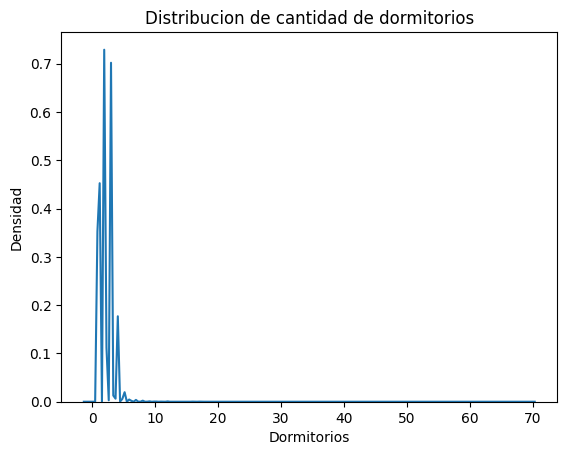

In [20]:
# Distribucion de la variable property_bedrooms
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de cantidad de dormitorios",xlabel="Dormitorios",ylabel="Densidad")

#### Feature: property_surface_total

In [21]:
# Medidas de resumen para la variable property_surface_total
df.property_surface_total.describe()

count     89405.000000
mean        109.092970
std         980.401976
min          10.000000
25%          45.000000
50%          65.000000
75%         105.000000
max      137000.000000
Name: property_surface_total, dtype: float64

In [22]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_surface_total.unique())

720

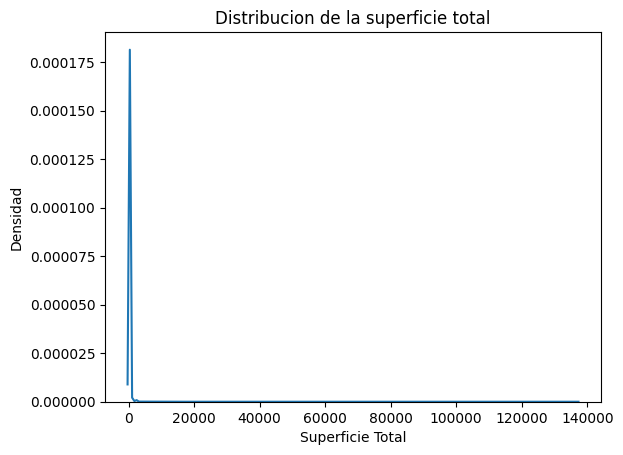

In [23]:
# Distribucion de la variable property_surface_total
sns_hist=sns.kdeplot(data=df.property_surface_total).set(title="Distribucion de la superficie total",xlabel="Superficie Total",ylabel="Densidad")

#### Feature: property_surface_covered

In [24]:
# Medidas de resumen para la variable property_surface_covered
df.property_surface_covered.describe()

count     90895.000000
mean         87.931932
std         990.927129
min           1.000000
25%          40.000000
50%          58.000000
75%          88.000000
max      217000.000000
Name: property_surface_covered, dtype: float64

In [25]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_surface_covered.unique())

591

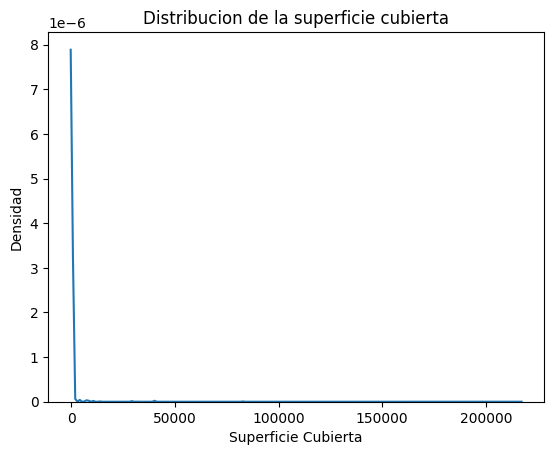

In [26]:
# Distribucion de la variable property_surface_covered
sns_hist=sns.kdeplot(data=df.property_surface_covered).set(title="Distribucion de la superficie cubierta",xlabel="Superficie Cubierta",ylabel="Densidad")

#### Heatmap correlaciones

<AxesSubplot:>

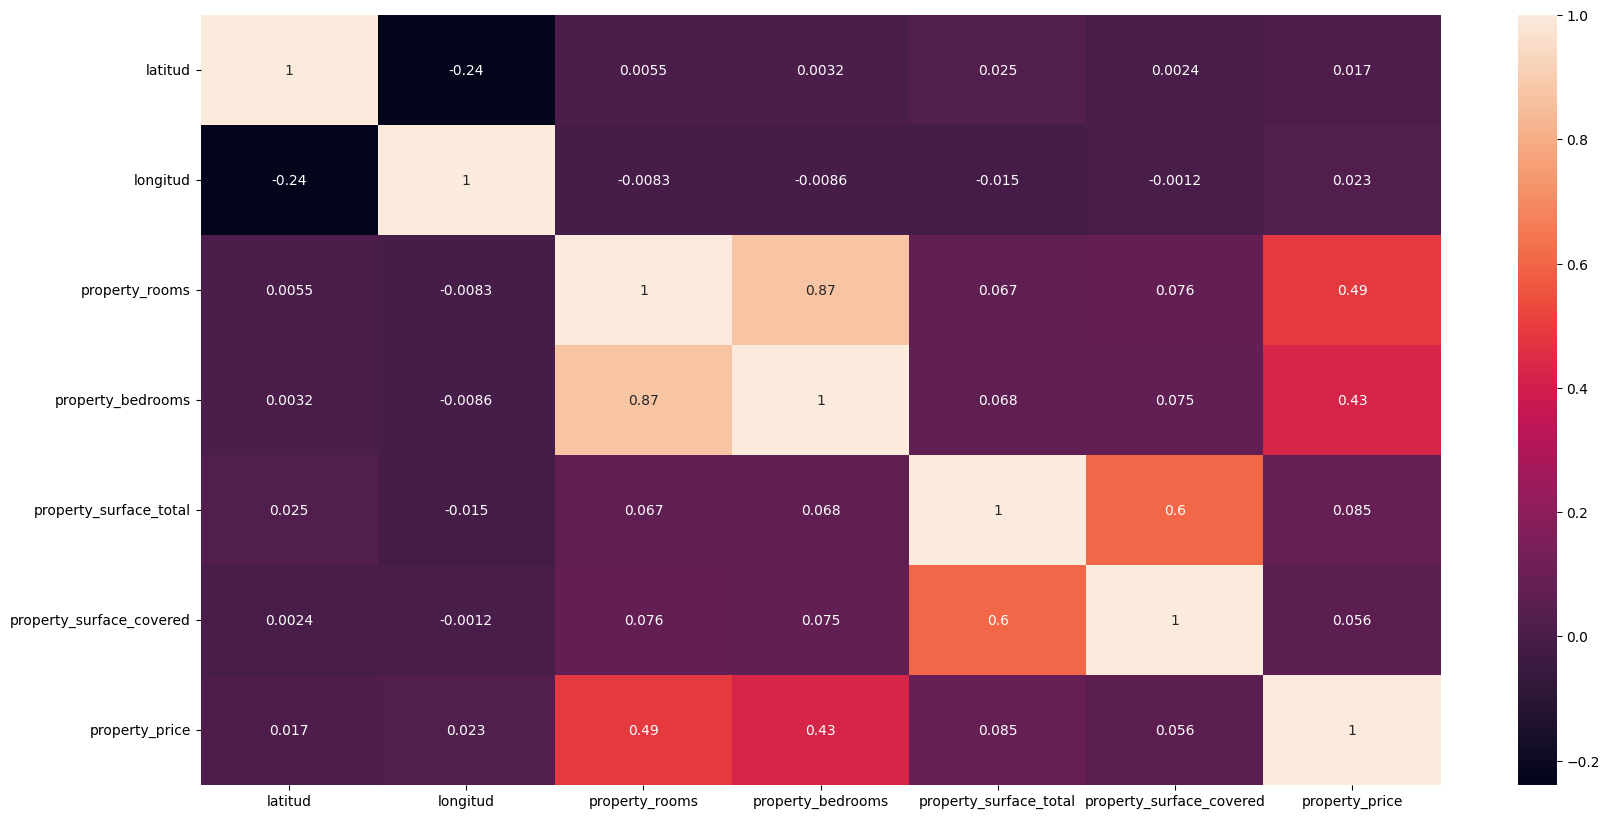

In [27]:
# Calculamos las correlaciones sin longitud y latitud
# matrx_corr=df.drop(labels=['longitud','latitud'], axis=1).corr()
matrx_corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(matrx_corr, annot=True)

Se ve cierta correlacion entre precio y numero de ambientes/dormitorios. Asi como tambien entre superficie total y cubierta

#### Dispersograma property_rooms vrs property_price

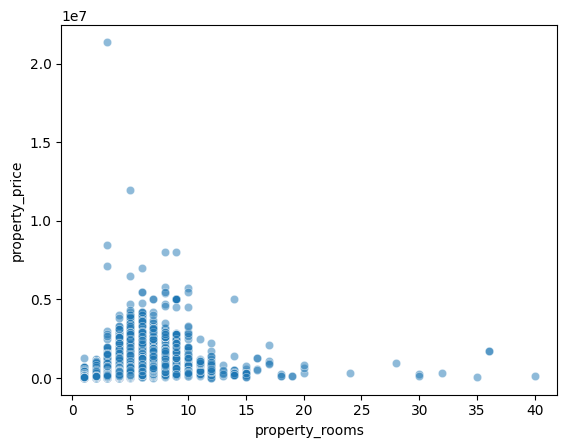

In [28]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_price", alpha=0.5)

#### Dispersograma property_bedroom vrs property_price

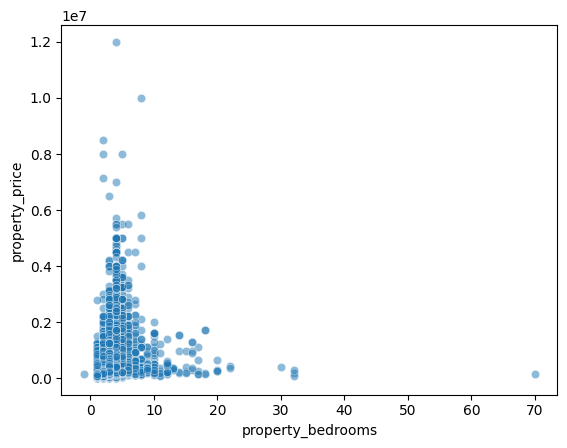

In [29]:
grf=sns.scatterplot(data=df, x="property_bedrooms", y="property_price", alpha=0.5)

#### Dispersograma property_rooms vrs property_surface_total

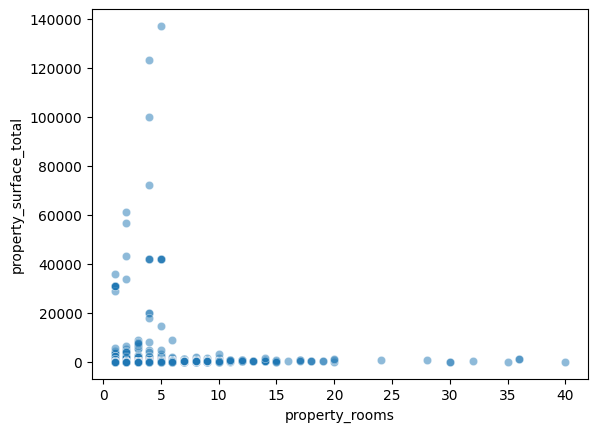

In [30]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_surface_total", alpha=0.5)

#### Dispersograma property_rooms vrs property_surface_covered

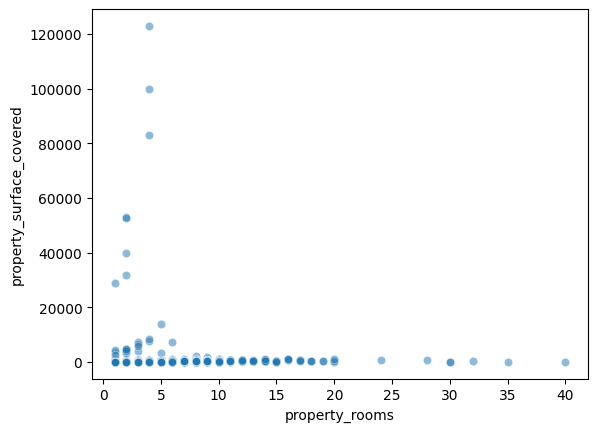

In [31]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_surface_covered", alpha=0.5)

#### Dispersograma property_room vrs property_bedroom

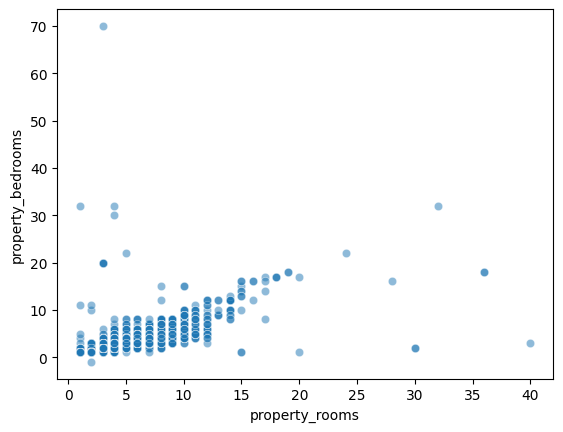

In [32]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_bedrooms", alpha=0.5)

#### Dispersograma property_surface_total vrs property_surface_covered

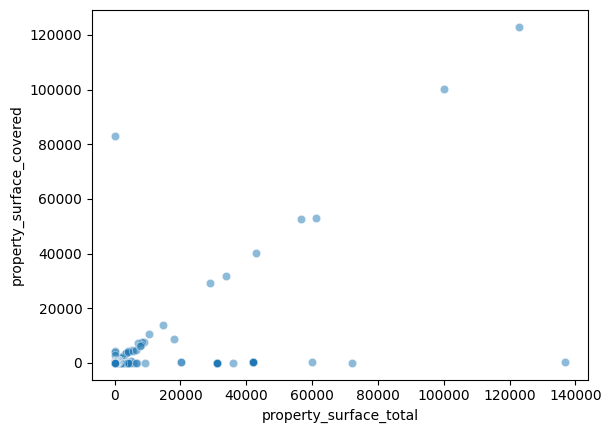

In [33]:
grf=sns.scatterplot(data=df, x="property_surface_total", y="property_surface_covered", alpha=0.5)

<h4 align="center"><b> Realizar un análisis gráfico de las distribuciones de las variables </b></h4>

<h5 style="color:#FF0000"> Tarea de cada uno. <br> Luego Ctrl + C y Ctrl + V</h5>

<h4 align="center"><b> Analizar las correlaciones existentes entre las variables </b></h4>

<h5 style="color:#FF0000"> Tarea de cada uno, investigar si su variable tiene alguna correlacion importante.<br> Luego Ctrl + C y Ctrl + V</h5>

**c) Valores atípicos:** analizar la existencia de valores atípicos
* Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
* Explicar qué características poseen los datos atípicos detectados.
* Decidir el tratamiento a aplicar sobre los mismos.
* Analizar la relación entre el precio de venta y los metros de superficie ¿hay
valores atípicos que no se detectaron previamente?

#### Feature: property_rooms

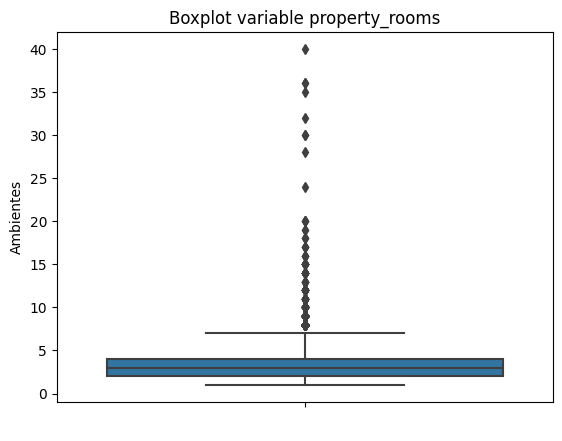

In [34]:
# Boxplot de la variable ambientes
grf_box=sns.boxplot(y="property_rooms", data=df).set(title="Boxplot variable property_rooms",xlabel=" ",ylabel="Ambientes")

Podemos observar multiples outliers, muchos de ellos extremos

In [35]:
outlier_rooms=df[df.property_rooms > 25]
outlier_rooms

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
4264,2021-03-15,2021-06-05,2021-03-15,-34.616391,-58.456038,Caballito,NaN,Departamento,30.0,2.0,79.0,79.0,230000.0,C/DEP COCH Y BAULERA - SEGUI AL 700 - Caballito
10581,2021-02-07,2021-06-15,2021-02-07,-34.649872,-58.483012,Parque Avellaneda,NaN,PH,30.0,2.0,72.0,60.0,123500.0,PH - Parque Avellaneda
18731,2021-08-03,9999-12-31,2021-08-03,-34.633236,-58.480313,Floresta,NaN,PH,32.0,32.0,535.0,435.0,300000.0,"Hotel Familiar, 32 Habitaciones"
30824,2021-08-19,9999-12-31,2021-08-19,NaN,NaN,Tribunales,NaN,Departamento,36.0,18.0,1348.0,NaN,1700000.0,Departamento - Tribunales
30826,2021-08-19,9999-12-31,2021-08-19,NaN,NaN,Tribunales,NaN,Departamento,36.0,18.0,1348.0,NaN,1700000.0,Departamento - Tribunales
31528,2021-03-24,2021-06-05,2021-03-24,-34.642037,-58.438995,Parque Chacabuco,NaN,Departamento,35.0,NaN,37.0,33.0,67000.0,Venta Departamento monoambiente balcón full am...
72247,2021-11-18,2021-12-02,2021-11-18,-34.588742,-58.422459,Palermo,NaN,Departamento,40.0,3.0,75.0,68.0,145000.0,SOLER 4400 - PALERMO - DPTO 4 AMB C/ BALCON AL...
78706,2021-05-05,2021-06-05,2021-05-05,-34.570959,-58.458106,Belgrano,NaN,Casa,28.0,16.0,845.0,845.0,950000.0,Imponente casa inglesa de 3 plantas S.S. en ...


Vemos que salvo el hotel y la casa inglesa, los demas no son posibles

In [36]:
# Seleccionamos todos menos el hotel y la casa inglesa
idx=outlier_rooms[outlier_rooms.property_title.apply(lambda x: not ('Hotel' in x or 'inglesa' in x))].index
# Y los eliminamos
df.drop(idx, inplace=True)

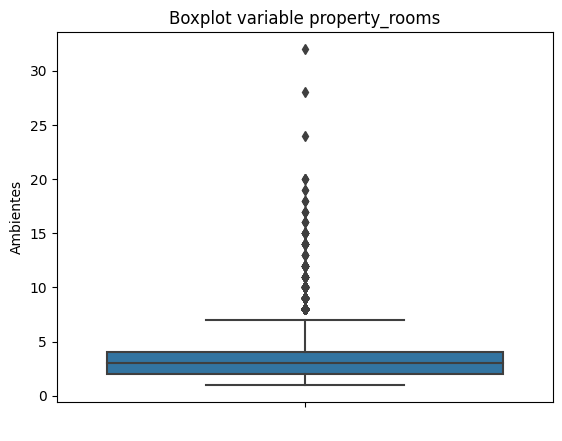

In [37]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_rooms", data=df).set(title="Boxplot variable property_rooms",xlabel=" ",ylabel="Ambientes")

#### Feature: property_bedrooms

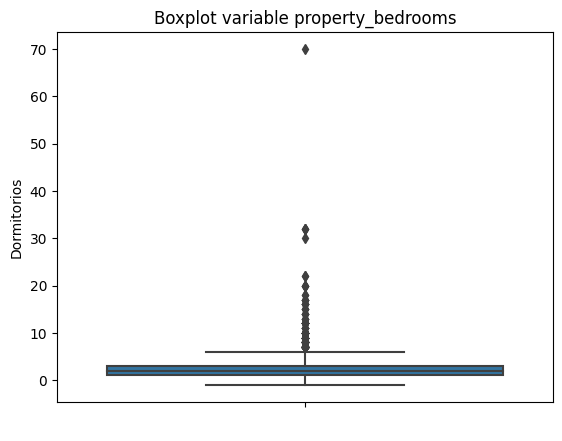

In [38]:
# Boxplot de la variable dormitorios
grf_box=sns.boxplot(y="property_bedrooms", data=df).set(title="Boxplot variable property_bedrooms",xlabel=" ",ylabel="Dormitorios")

Nuevamente vemos multiples outliers, algunos de ellos extremos

In [39]:
outlier_bedrooms=df[df.property_bedrooms > 25]
outlier_bedrooms

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
9819,2021-03-14,2021-06-05,2021-03-14,-34.608645,-58.485619,Villa del Parque,NaN,Departamento,4.0,32.0,83.0,75.0,189000.0,Departamento 4 ambientes a estrenar en duplex ...
10140,2021-10-16,2021-12-24,2021-10-16,-34.630186,-58.389156,Parque Patricios,NaN,Departamento,1.0,32.0,32.0,32.0,52000.0,Depto 1 ambiente amplio apto profesional
17940,2021-03-26,2021-06-05,2021-03-26,-34.591110,-58.400685,Recoleta,NaN,Departamento,4.0,30.0,148.0,138.0,380000.0,Departamento. Recoleta. Balcón terraza. Silenc...
18731,2021-08-03,9999-12-31,2021-08-03,-34.633236,-58.480313,Floresta,NaN,PH,32.0,32.0,535.0,435.0,300000.0,"Hotel Familiar, 32 Habitaciones"
19830,2021-09-24,2022-01-27,2021-09-24,-34.646632,-58.497902,Villa Luro,NaN,Departamento,3.0,70.0,NaN,70.0,135000.0,Departamento - Villa Luro


Vemos que salvo el hotel, el resto de datos no son posibles

In [40]:
# Seleccionamos todos menos el hotel
idx=outlier_bedrooms[outlier_bedrooms.property_title.apply(lambda x: 'Hotel' not in x)].index
# Y los eliminamos
df.drop(idx, inplace=True)

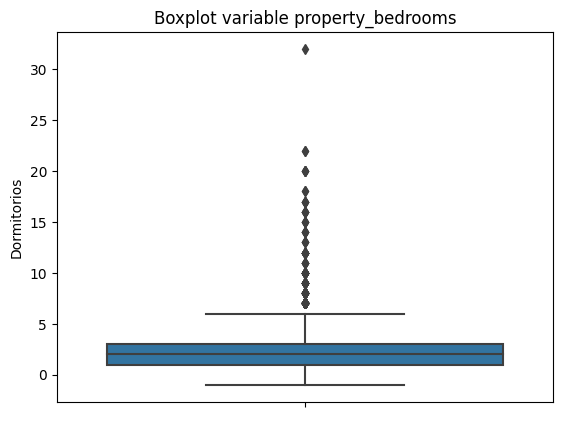

In [41]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_bedrooms", data=df).set(title="Boxplot variable property_bedrooms",xlabel=" ",ylabel="Dormitorios")

#### Feature: property_surface_total

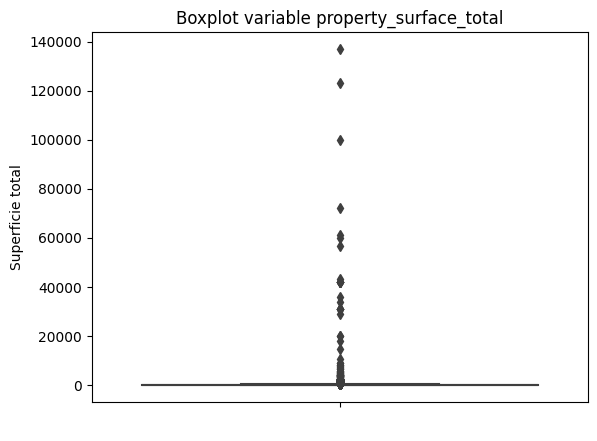

In [42]:
# Boxplot de la variable superficie total
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

Se observa una gran cantidad de outliers y muy extremos

In [43]:
# Buscamos observaciones mayores a 10mil m2
outlier_sfc_total=df[df.property_surface_total > 10000]
# Verificamos si son valores posibles
outlier_sfc_total

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
201,2021-09-09,2022-01-27,2021-09-09,-34.605781,-58.376705,San Nicolás,NaN,Departamento,NaN,NaN,10500.0,10500.0,9900000.0,EDIFICIO A TERMINAR DE 900M2- EXCELENTE UBICAC...
15080,2021-05-29,2021-06-08,2021-05-29,-34.578917,-58.429373,Palermo,NaN,Departamento,2.0,1.0,61130.0,53030.0,225000.0,VENTA DEPARTAMENTO 2 AMBIENTES PALERMO C/AMENI...
15148,2021-05-29,2021-06-13,2021-05-29,-34.600113,-58.403649,Balvanera,NaN,Departamento,2.0,1.0,33800.0,31670.0,66000.0,VENTA 2 AMBIENTES CON RENTA
17521,2021-02-05,2021-05-16,2021-02-05,-34.588175,-58.396261,Recoleta,NaN,Departamento,1.0,NaN,36000.0,30.0,90000.0,Departamento Monoambiente alquiler temporario ...
22043,2021-03-11,2021-04-20,2021-03-11,-34.587320,-58.401556,Barrio Norte,NaN,Departamento,2.0,1.0,56740.0,52540.0,175000.0,EXCELENTE DEPARTAMENTO DE 2 AMBIENTES DE CATEG...
24644,2021-08-18,2021-08-23,2021-08-18,-34.550093,-58.483034,Saavedra,NaN,Departamento,2.0,1.0,43086.0,40038.0,114000.0,"Venta Departamento 2 amb a Estrenar, Saavedra."
26559,2021-10-05,2021-11-04,2021-10-05,-34.579163,-58.455725,Colegiales,NaN,Departamento,1.0,NaN,31000.0,26.0,51100.0,Av. Alvarez Thomas 970 - Colegiales - Capital ...
26934,2021-07-01,9999-12-31,2021-07-01,-34.599421,-58.386867,Barrio Norte,NaN,Departamento,5.0,3.0,137000.0,135.0,390000.0,Alquiler Divino 5 Amb. - 137 M² en Barrio Norte
44867,2021-03-07,2022-02-09,2021-03-07,-34.636532,-58.376406,Barracas,NaN,Departamento,4.0,3.0,72060.0,90.0,210000.0,"VENTA SEMIPISO 4 AMBIENTES, EXCELENTE OPORTUIDAD"
48558,2021-02-27,2021-03-03,2021-02-27,-34.628721,-58.421383,Boedo,NaN,PH,4.0,3.0,20041.0,139.0,390000.0,PH 4 AMB.C/QUINCHO Y TERRAZA AL FRENTE S/EXPENSAS


In [44]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_total.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

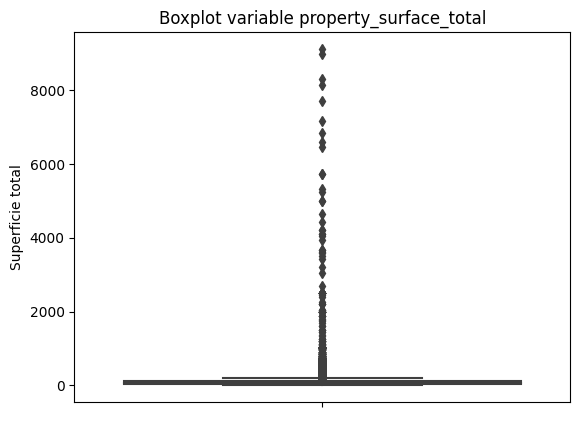

In [45]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

In [46]:
# Buscamos observaciones mayores a mil m2 pero menos de 5 ambientes y que no sean casas
outlier_sfc_rooms=df[df.apply(lambda x: x['property_surface_total'] > 1000 and x['property_rooms'] < 5 and x['property_type'] != 'Casa', axis=1)]
# Verificamos si son valores posibles
outlier_sfc_rooms

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
364,2021-12-17,2022-03-25,2021-12-17,-34.584521,-58.424260,Palermo,NaN,Departamento,2.0,1.0,2032.0,37.0,87000.0,Departamento/Venta/2 Ambientes/Excelente/Palermo
6728,2021-02-08,9999-12-31,2021-02-08,-34.634196,-58.465152,Flores,NaN,Departamento,1.0,1.0,4428.0,31.0,58552.0,Departamento - Flores
6941,2021-02-08,2021-03-04,2021-02-08,-34.554356,-58.458076,Belgrano,NaN,Departamento,2.0,1.0,2500.0,51.0,189850.0,VENTA DEPARTAMENTO 2 AMBIENTES PISO ALTO BELGRANO
6950,2021-02-08,2021-05-01,2021-02-08,-34.557903,-58.452293,Belgrano,NaN,Departamento,4.0,3.0,5000.0,109.0,418000.0,VENTA DEPARTAMENTO 3-4 AMBIENTES COCHERA BELG...
7038,2021-02-08,2021-03-18,2021-02-08,-34.611660,-58.393440,Balvanera,NaN,Departamento,2.0,1.0,2383.0,37.0,64000.0,VENTA HERMOSO 2 AMBIENTES BALVANERA. OPORTUNIDAD
7085,2021-02-08,2021-05-01,2021-02-08,-34.628565,-58.445791,Caballito,NaN,Departamento,4.0,3.0,2000.0,162.0,449900.0,VENTA DEPARTAMENTO 4 AMBIENTES C/COCHERA CABAL...
7274,2021-02-08,2021-03-18,2021-02-08,-34.573000,-58.481100,Villa Urquiza,NaN,Departamento,1.0,NaN,3660.0,33.0,98000.0,Venta Depto monoambiente a estrenar villa Urquiza
7276,2021-02-08,2021-03-07,2021-02-08,-34.573375,-58.480012,Villa Urquiza,NaN,Departamento,2.0,1.0,3500.0,60.0,169000.0,Departamento dos ambientes Villa Urquiza. Est...
12199,2021-03-13,2021-03-16,2021-03-13,-34.563005,-58.453674,Belgrano,NaN,Departamento,3.0,2.0,2500.0,66.0,289500.0,VENTA DEPARTAMENTO 3 AMB COCHERA BELGRANO
12205,2021-03-13,2021-03-16,2021-03-13,-34.563005,-58.453674,Belgrano,NaN,Departamento,3.0,2.0,2500.0,66.0,299900.0,VENTA DEPARTAMENTO 3 AMB COCHERA BELGRANO


In [47]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_rooms.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

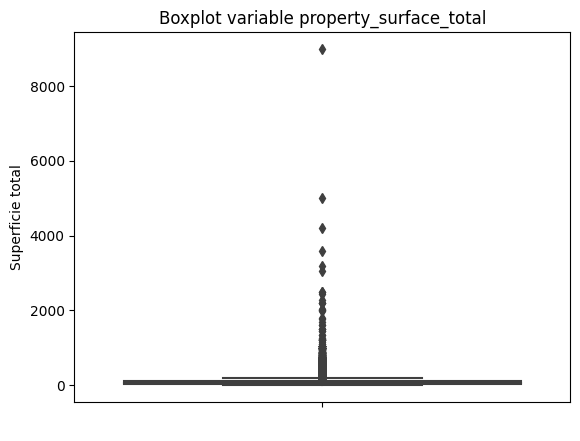

In [48]:
# Volvemos a graficar un boxplot una ultima vez luego de eliminar mas propiedades
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

#### Feature: property_surface_covered

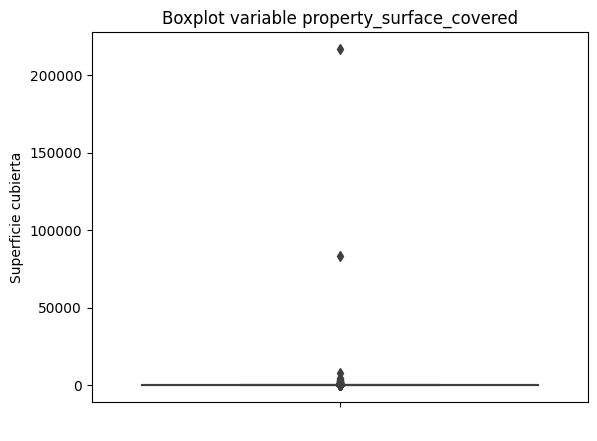

In [49]:
# Boxplot de la variable superficie cubierta
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

In [50]:
# Buscamos observaciones mayores a 3mil m2
outlier_sfc_cov=df[df.property_surface_covered > 3000]
outlier_sfc_cov

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
311,2021-12-17,9999-12-31,2021-12-17,-34.637026,-58.426283,Parque Chacabuco,NaN,Casa,NaN,NaN,NaN,217000.0,250000.0,EXCEPCIONAL CASA DOS FAMILIAS - Parque Chacabuco
6211,2021-10-15,2022-01-27,2021-10-15,NaN,NaN,San Telmo,NaN,Departamento,2.0,1.0,48.0,4435.0,93500.0,Dptos 2 amb a estrenar en San Telmo!!!
17850,2021-03-26,2021-06-05,2021-03-26,-34.572494,-58.462433,Belgrano,NaN,Casa,5.0,4.0,3197.0,3367.0,12000000.0,Casa - Belgrano R
41142,2021-07-25,9999-12-31,2021-07-25,-34.604362,-58.392366,Barrio Norte,NaN,Departamento,4.0,NaN,83.0,83000.0,155000.0,AMPLIO DEPTO EN VENTA BARRIO NORTE
64154,2021-01-06,2021-01-09,2021-01-06,-34.649174,-58.413106,Pompeya,NaN,PH,6.0,2.0,8988.0,7454.0,125000.0,PH en venta en Nueva Pompeya
71866,2021-11-04,2022-01-27,2021-11-04,-34.579394,-58.453519,Colegiales,NaN,Departamento,3.0,2.0,41.0,3837.0,83000.0,Departamento - Colegiales


In [51]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_cov.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

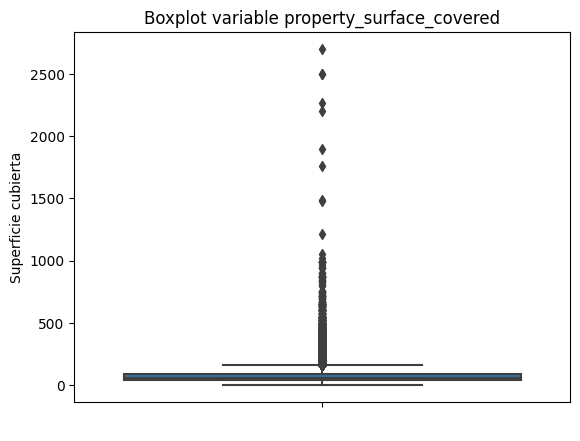

In [52]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

In [53]:
# Buscamos observaciones mayores a mil m2 cubiertos pero menos de 5 ambientes y que no sean casas
outlier_covsfc_rooms=df[df.apply(lambda x: x['property_surface_covered'] > 1000 and x['property_rooms'] < 5 and x['property_type'] != 'Casa', axis=1)]
# Verificamos si son valores posibles
outlier_covsfc_rooms

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
89120,2021-10-27,2022-01-04,2021-10-27,-34.630704,-58.400901,Parque Patricios,NaN,Departamento,1.0,NaN,31.0,2700.0,71500.0,"DEPARTAMENTO - PQUE.PATRICIOS, 2 AMBIENTES, B..."


In [54]:
# Vemos que hay un valor que no es posible
idx=outlier_covsfc_rooms.index
# Y procedemos a borrarlo
df.drop(idx, inplace=True)

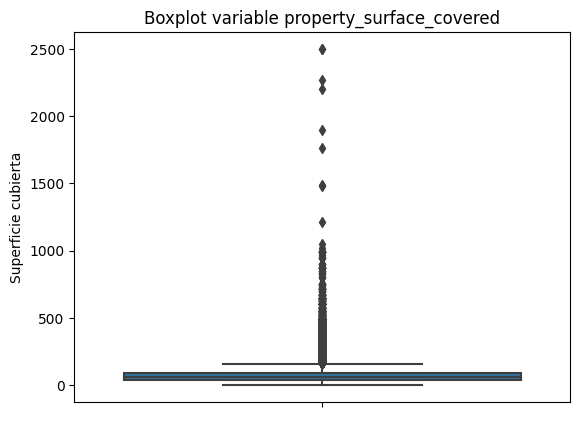

In [55]:
# Volvemos a graficar un boxplot una ultima despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

**b) Datos Faltantes:** analizar la presencia de datos faltantes en el dataset
* Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset
* Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de
datos faltantes de cada registro. Realizar un gráfico que permita conocer la
proporción de faltantes por fila en el dataset.
* Determinar, de ser posible, estrategias para reparar los valores faltantes.
* En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

<h4 align="center"><b> Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset </b></h4>

In [56]:
na_ratio_column = pd.DataFrame()
na_ratio_column["Percent"] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
na_ratio_column["Count"] =(df.isnull().sum()).sort_values(ascending = False)

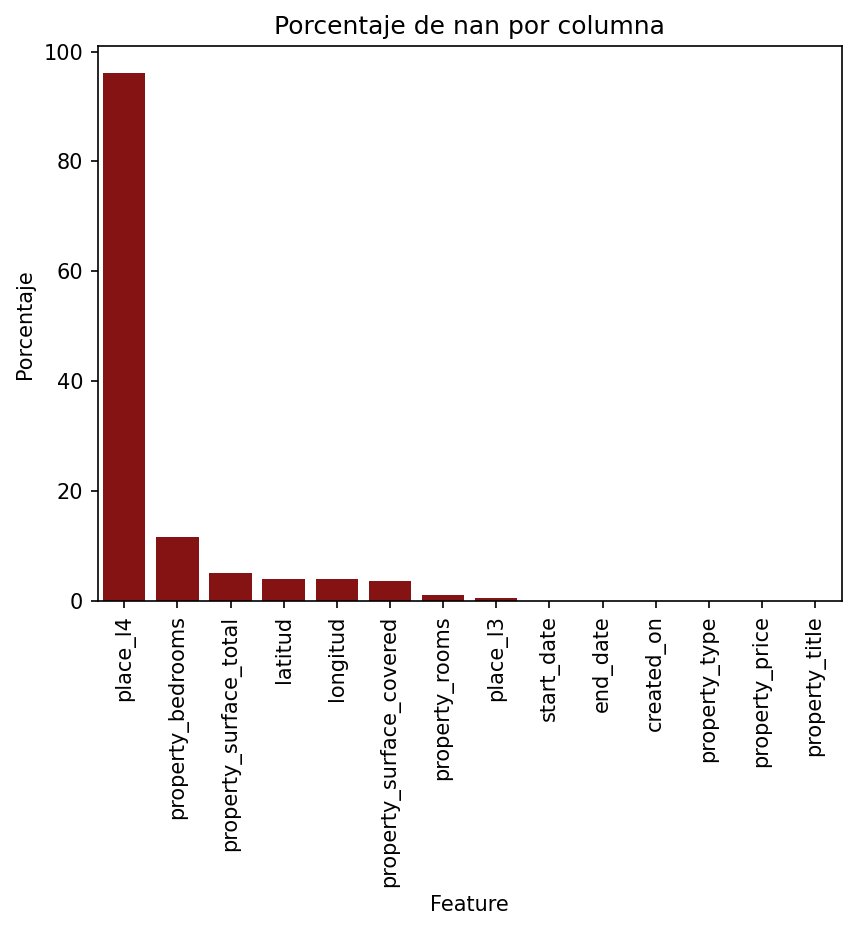

In [57]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Percent'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Porcentaje")
plt.xlabel("Feature")
plt.title("Porcentaje de nan por columna")
plt.xticks(rotation=90)
plt.show()

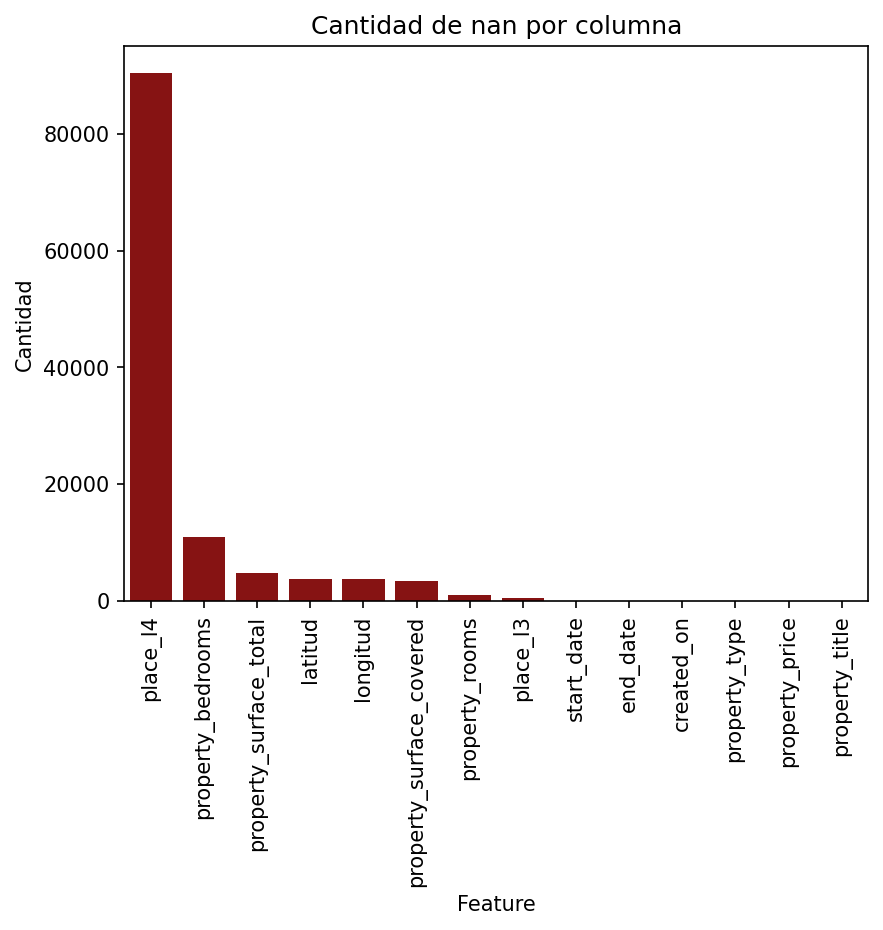

In [58]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Count'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Cantidad")
plt.xlabel("Feature")
plt.title("Cantidad de nan por columna")
plt.xticks(rotation=90)
plt.show()

<h4 align="center"><b> Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset </b></h4>

In [59]:
na_ratio_row = pd.DataFrame()
n_column = df.shape[1]
na_ratio_row["Percent"] = df.isnull().sum(axis=1) / n_column
na_ratio_row["Count"] = df.isnull().sum(axis=1)

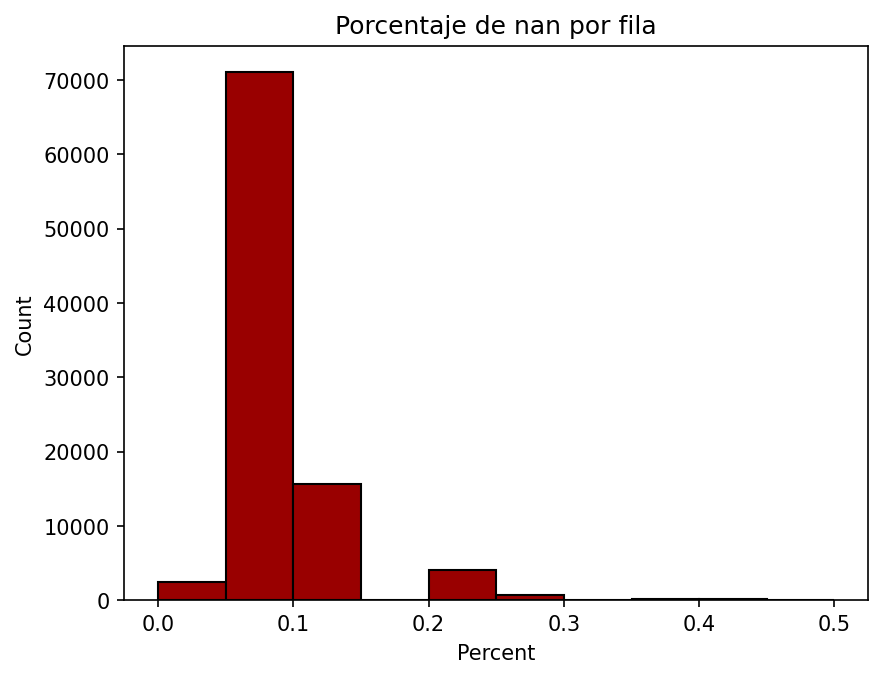

In [60]:
plt.figure(dpi=150)
sns.histplot(data=na_ratio_row, x="Percent", bins=10, color=(0.6, 0, 0), alpha = 1)
plt.title("Porcentaje de nan por fila")
plt.show()

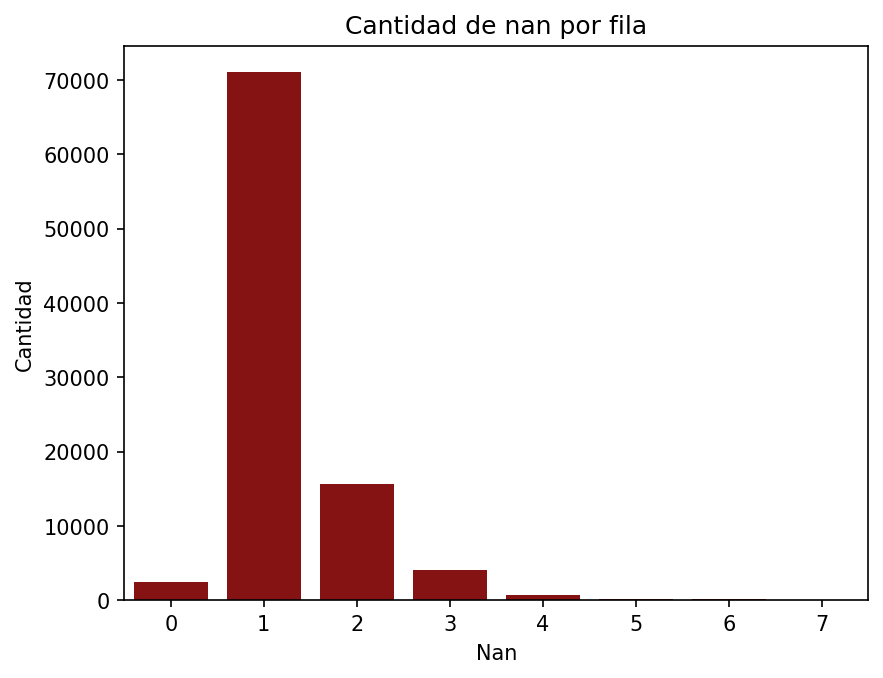

In [61]:
plt.figure(dpi=150)
sns.countplot(
    x="Count", data=na_ratio_row, color=(0.6, 0, 0), alpha = 1
)
plt.ylabel("Cantidad")
plt.xlabel("Nan")
plt.title("Cantidad de nan por fila")
plt.show()

#### Datos faltantes: property_rooms

In [62]:
# Vemos cuantas filas tienen datos faltantes de property_rooms
df.property_rooms.isnull().sum()

1041

In [63]:
# Borramos las filas vacias
idx=df[df.property_rooms.isnull()].index
df.drop(idx, inplace=True)

In [64]:
# Vemos si hay valores negativos
(df.property_rooms <= 0).any()

False

#### Datos faltantes: property_bedrooms

In [65]:
# Vemos cuantas filas tienen datos faltantes de property_bedrooms
df.property_bedrooms.isnull().sum()

10539

In [66]:
# Vemos si hay valores negativos
(df.property_bedrooms <= 0).sum()

1

In [67]:
# Borramos el valor negativo
idx=df[df.property_bedrooms <= 0].index
df.drop(idx, inplace=True)

In [68]:
# Vemos cuantas propiedades tienen mas dormitorios que ambientes, lo cual no tiene sentido
df.apply(lambda row: True if row['property_rooms'] < row['property_bedrooms'] else False, axis=1).sum()

147

In [69]:
# Borramos las propiedades con mas dormitorios que ambientes
idx=df[df.apply(lambda row: True if row['property_rooms'] < row['property_bedrooms'] else False, axis=1)].index
df.drop(idx, inplace=True)

#### Datos faltantes: property_surface_total

In [70]:
# Vemos cuantas filas tienen datos faltantes de property_surface_total
df.property_surface_total.isnull().sum()

4603

In [71]:
# Vemos si hay valores negativos
(df.property_surface_total <= 0).any()

False

#### Datos faltantes: property_surface_covered

In [72]:
# Vemos cuantas filas tienen datos faltantes de property_surface_covered
df.property_surface_covered.isnull().sum()

3255

In [73]:
# Vemos si hay valores negativos
(df.property_surface_covered <= 0).any()

False

In [74]:
# Vemos cuantas propiedades tienen mas superficie cubierta que total, lo cual no tiene sentido
df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1).sum()

188

In [75]:
# Borramos las propiedades con mas superficie cubierta que total
idx=df[df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1)].index
df.drop(idx, inplace=True)

<h4 align="center"><b> Determinar, de ser posible, estrategias para reparar los valores faltantes </b></h4>

#### Completamos los datos faltantes de dormitorios utilizando la moda segun la cantidad de ambientes

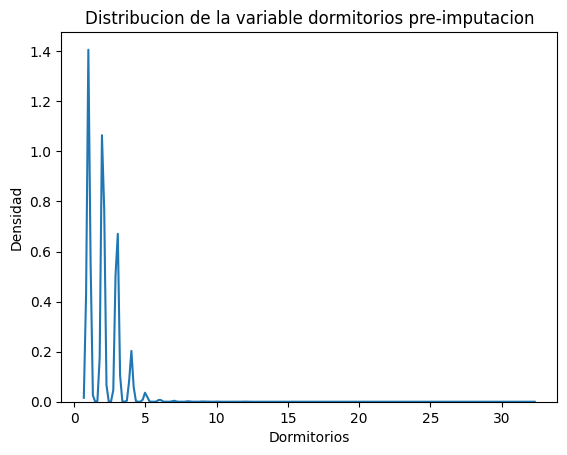

In [76]:
# Distribucion de la variable property_bedrooms antes de imputar o reparar datos
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de la variable dormitorios pre-imputacion",xlabel="Dormitorios",ylabel="Densidad")

In [77]:
# Vamos a calcular la moda para el feature dormitorios dependiendo de cuantos ambientes tenga la propiedad
df_na=df[df.property_bedrooms.isna()]
unique_rooms=df_na.property_rooms.unique().tolist()

for n in unique_rooms:
    # Calculamos la moda para cada valor unico de ambientes
    aux=df[df.property_rooms == n]
    moda=aux.property_bedrooms.mode()[0]
    # Le asignamos el valor que corresponda a cada celda de dormitorio que este vacia
    mask = ((df['property_bedrooms'].isnull())) & (df['property_rooms'] == n)
    df.loc[mask, 'property_bedrooms'] = moda

In [78]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_bedrooms.isnull().sum()

0

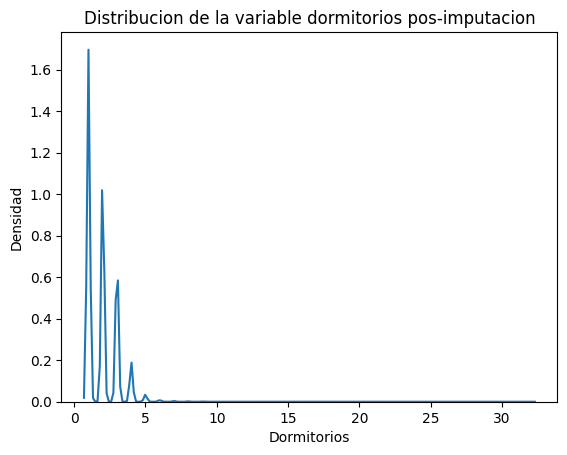

In [79]:
# Distribucion de la variable property_bedrooms despues de imputar o reparar datos
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de la variable dormitorios pos-imputacion",xlabel="Dormitorios",ylabel="Densidad")

#### Completamos los datos faltantes de superficie total y cubierta utilizando regresion lineal

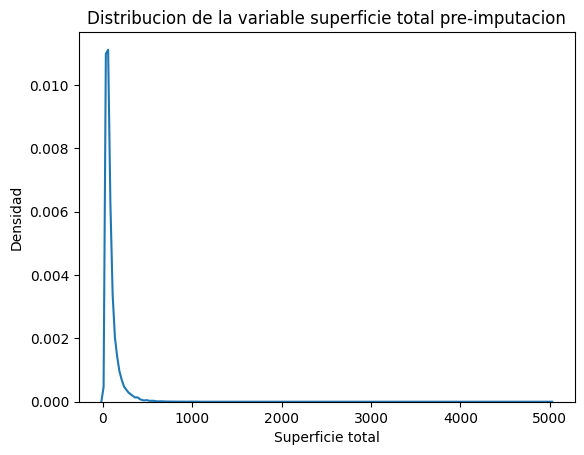

In [80]:
# Distribucion de la variable property_surface_total antes de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_total']).set(title="Distribucion de la variable superficie total pre-imputacion",xlabel="Superficie total",ylabel="Densidad")

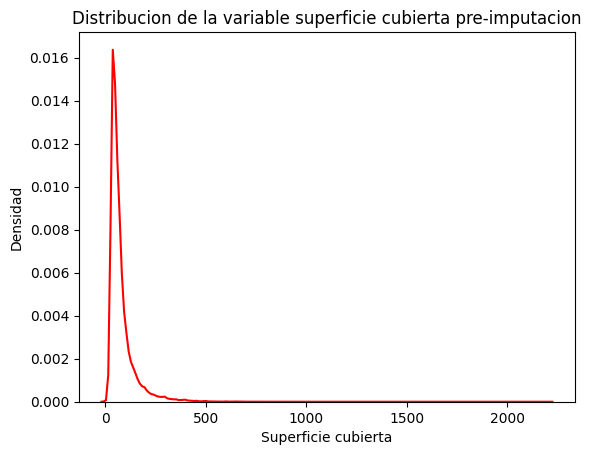

In [81]:
# Distribucion de la variable property_surface_covered antes de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_covered'] ,color='r').set(title="Distribucion de la variable superficie cubierta pre-imputacion",xlabel="Superficie cubierta",ylabel="Densidad")

In [82]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Tomamos las columnas de superficie total y cubierta
columns=['property_surface_total','property_surface_covered']
df_aux=df[columns].copy()

# Imputamos los datos nuevos utilizando regresion lineal entre ambas features
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0)
df_aux=imp.fit_transform(df_aux[columns])

# Ponemos los datos nuevamente en nuestro dataframe
df[columns]=df_aux

In [83]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_surface_total.isnull().sum()

0

In [84]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_surface_covered.isnull().sum()

0

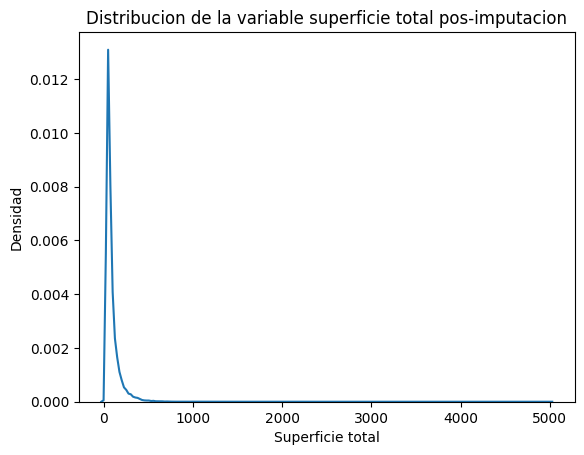

In [85]:
# Distribucion de la variable property_surface_total despues de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_total']).set(title="Distribucion de la variable superficie total pos-imputacion",xlabel="Superficie total",ylabel="Densidad")

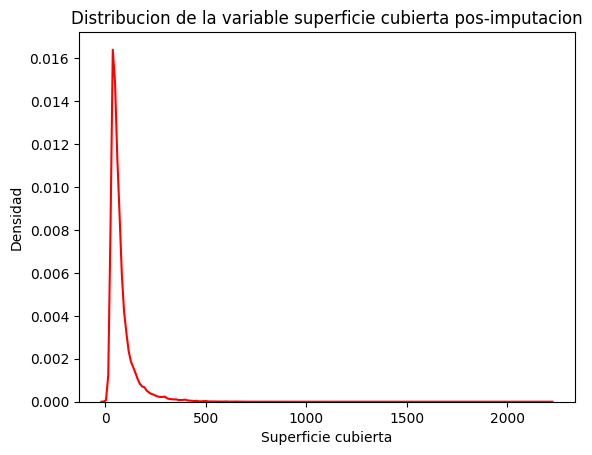

In [86]:
# Distribucion de la variable property_surface_covered despues de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_covered'] ,color='r').set(title="Distribucion de la variable superficie cubierta pos-imputacion",xlabel="Superficie cubierta",ylabel="Densidad")

In [87]:
# Volvemos a chequear cuantas propiedades tienen mas superficie cubierta que total, lo cual no tiene sentido
df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1).sum()

956

En principio, esto no estaria bien. Hay que rever

In [88]:
# Codigo

<h4 align="center"><b> En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes </b></h4>

In [89]:
# Codigo

In [90]:
# Codigo

In [91]:
# Codigo

In [92]:
# Codigo

**d) Reducción de la dimensionalidad:** en este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

In [93]:
# Codigo

In [94]:
# Codigo

In [95]:
# Codigo

**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [96]:
# Codigo

In [97]:
# Codigo

In [98]:
# Codigo

In [99]:
# Codigo

### **3. Clasificación**

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [100]:
# Codigo

In [101]:
# Codigo

In [102]:
# Codigo

In [103]:
# Codigo

**b) Entrenamiento y Predicción**

Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**


**Modelo 1 : Árbol de decisión**

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [104]:
# Codigo

In [105]:
# Codigo

In [106]:
# Codigo

In [107]:
# Codigo

**Modelo 2: Random Forest**

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [108]:
# Codigo

In [109]:
# Codigo

In [110]:
# Codigo

In [111]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [112]:
# Codigo

In [113]:
# Codigo

In [114]:
# Codigo

In [115]:
# Codigo

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R:

### **4. Regresión**

En esta etapa se busca predecir el precio de la propiedad utilizando dos modelos diferentes.
Para todos los modelos se pide:

* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (encoding, normalización, etc)
* Todos los modelos deben ser entrenados también con el dataset generado en el
punto **1 d)**

**Modelo 1: KNN**

a. Construir un modelo [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) para regresión y optimizar sus hiperparámetros
mediante *k-fold Cross Validation* para obtener la mejor performance .¿Cuántos
*folds* utilizaron? ¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [116]:
# Codigo

In [117]:
# Codigo

In [118]:
# Codigo

**Modelo 2: XGBoost**

a. Construir un modelo **XGBoost** y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [119]:
# Codigo

In [120]:
# Codigo

In [121]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante *cross-validation*) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación explicando todas las métricas.

In [122]:
# Codigo

In [123]:
# Codigo

In [124]:
# Codigo

¿Qué modelo elegirían para predecir el precio de venta de las propiedades?

R:

### **5. Conclusiones**

Realizar las conclusiones correspondientes al trabajo realizado en su totalidad, destacando
principalmente los aspectos que consideren más relevantes. Comentar brevemente qué otras
opciones hubiesen explorado y quedaron fuera del alcance de este trabajo

R: